# todo (18/05/2021)
* __rsync data of one participant (locEMsexp)__
* __basic visualization__
* __experimental design__
* __try first level_glm__

In [ ]:
# todo next
* try concatened runs instead of average
* save the different glmn output as nifti images and look at them in sofwares
* put them in pycortex flatmaps and draw areas
% GLM of pRF to later delete
% GLM of smooth pursuit
% comparison smooth pursuit vs saccade
% other subject
% mni average subjects

# questions
* is it better to do glm from average runs or concatenated runs ?

In [71]:
# imports
import os
import numpy as np
import pandas as pd
from nilearn import image, datasets, plotting
from nilearn.glm.first_level import FirstLevelModel
from nilearn.glm import threshold_stats_img
from nilearn.plotting import plot_design_matrix, plot_stat_map, plot_anat, plot_img
import matplotlib.pyplot as plt

In [2]:
# inputs
user_login = 'mszinte'
#user_login = 'vmorita'
subject = 'sub-01'
session = 'ses-01'
task = 'SacLoc'
space = 'T1w'
preproc = 'fmriprep_dct'
tr_dur = 1.2
cwd = os.getcwd()

In [6]:
# rsync func data
trans_cmd = 'rsync -avuz --progress'
orig_file = '{}@login.mesocentre.univ-amu.fr:/scratch/mszinte/data/PredictEye/pp_data/{}/func'.\
                format(user_login,subject)
dest_file = '{}/pp_data/{}/func'.format(cwd,subject)
try: os.makedirs(dest_file)
except: pass

print("{cmd} {orig} {dest}".format(cmd = trans_cmd, orig = orig_file, dest = dest_file))
# os.system("{cmd} {orig} {dest}".format(cmd = trans_cmd, orig = orig_file, dest = dest_file))

rsync -avuz --progress mszinte@login.mesocentre.univ-amu.fr:/scratch/mszinte/data/PredictEye/pp_data/sub-01/func /Users/martinszinte/Dropbox/Data/Martin/Experiments/nilearn_tuto/pp_data/sub-01/func


In [7]:
# rsync anat data
trans_cmd = 'rsync -avuz --progress'
orig_file = '{user_login}@login.mesocentre.univ-amu.fr:/scratch/mszinte/data/PredictEye/deriv_data/fmriprep/fmriprep/{subject}/anat/{subject}_desc-preproc_T1w.nii.gz'.\
                format(user_login=user_login, subject=subject)
dest_file = '{}/pp_data/{}/anat'.format(cwd,subject)
try: os.makedirs(dest_file)
except: pass

print("{cmd} {orig} {dest}".format(cmd = trans_cmd, orig = orig_file, dest = dest_file))
# os.system("{cmd} {orig} {dest}".format(cmd = trans_cmd, orig = orig_file, dest = dest_file))

rsync -avuz --progress mszinte@login.mesocentre.univ-amu.fr:/scratch/mszinte/data/PredictEye/deriv_data/fmriprep/fmriprep/sub-01/anat/sub-01_desc-preproc_T1w.nii.gz /Users/martinszinte/Dropbox/Data/Martin/Experiments/nilearn_tuto/pp_data/sub-01/anat


In [8]:
# rsync events data
trans_cmd = 'rsync -avuz --progress'
orig_file = '{user_login}@login.mesocentre.univ-amu.fr:/scratch/mszinte/data/PredictEye/bids_data/{subject}/{session}/func/{subject}_{session}_task-{task}_run-*_events.tsv'.\
                format(user_login=user_login, subject=subject, session=session, task=task)
dest_file = '{}/pp_data/{}/events'.format(cwd,subject)
try: os.makedirs(dest_file)
except: pass

print("{cmd} {orig} {dest}".format(cmd = trans_cmd, orig = orig_file, dest = dest_file))
# os.system("{cmd} {orig} {dest}".format(cmd = trans_cmd, orig = orig_file, dest = dest_file))

rsync -avuz --progress mszinte@login.mesocentre.univ-amu.fr:/scratch/mszinte/data/PredictEye/bids_data/sub-01/ses-01/func/sub-01_ses-01_task-SacLoc_run-*_events.tsv /Users/martinszinte/Dropbox/Data/Martin/Experiments/nilearn_tuto/pp_data/sub-01/events


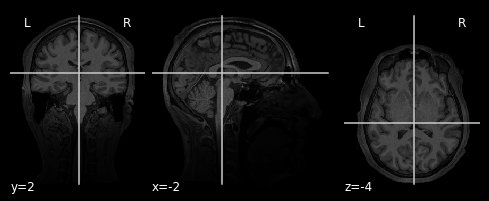

In [67]:
# plot t1w/t2w subject anat
anat_img = "pp_data/{subject}/anat/{subject}_desc-preproc_T1w.nii.gz".\
                format(subject=subject)

plotting.plot_anat(anat_img = anat_img)

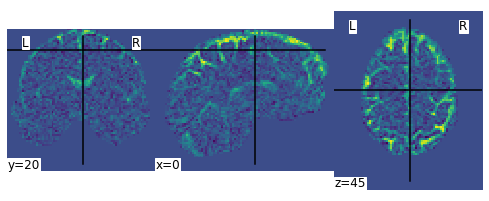

In [13]:
# plot epi tr = 1
file_img = "pp_data/{subject}/func/{subject}_task-{task}_space-{space}_{preproc}_avg.nii.gz".\
                format(subject=subject,task=task,space=space,preproc=preproc)
plotting.plot_epi(epi_img = image.index_img(file_img, 0), cmap='viridis', black_bg=False)

In [14]:
# create design table
design_file_run1 = '{cwd}/pp_data/{subject}/events/{subject}_{session}_task-{task}_{run}_events.tsv'.\
                        format(cwd=cwd, subject=subject, session=session, task=task, run='run-01')
events_run1 = pd.read_table(design_file_run1)

design_file_run2 = '{cwd}/pp_data/{subject}/events/{subject}_{session}_task-{task}_{run}_events.tsv'.\
                        format(cwd=cwd, subject=subject, session=session, task=task, run='run-02')
events_run2 = pd.read_table(design_file_run2)

In [19]:
events_run1_glm = events_run1[['onset','duration','trial_type']]
events_run1_glm.replace({'trial_type': {3: 'Fix', 1: 'Sac'}},inplace=True)
events_run1_glm

/Users/martinszinte/anaconda3/envs/idp/lib/python3.7/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


onset  duration trial_type
0    7765.261977  1.216853        Fix
1    7766.487123  1.192574        Fix
2    7767.687955  1.192073        Fix
3    7768.887879  1.192105        Fix
4    7770.090144  1.198938        Fix
..           ...       ...        ...
203  8009.028750  1.192030        Fix
204  8010.229148  1.191947        Fix
205  8011.429428  1.191982        Fix
206  8012.629747  1.192015        Fix
207  8013.830090  1.192063        Fix

[208 rows x 3 columns]

In [55]:
onset = [    0*tr_dur,
             16*tr_dur,
             (16+32)*tr_dur,
             (16+32+16)*tr_dur,
             (16+32+16+32)*tr_dur,
             (16+32+16+32+16)*tr_dur,
             (16+32+16+32+16+32)*tr_dur,
             (16+32+16+32+16+32+16)*tr_dur,
             (16+32+16+32+16+32+16+32)*tr_dur]

duration = [ 16*tr_dur,
             32*tr_dur,
             16*tr_dur,
             32*tr_dur,
             16*tr_dur,
             32*tr_dur,
             16*tr_dur,
             32*tr_dur,
             16*tr_dur,
             ]

trial_type = ['Fix','Sac','Fix','Sac','Fix','Sac','Fix','Sac','Fix']

data = {'onset':onset,
        'duration':duration,
        'trial_type':trial_type}

events_run1_glm = pd.DataFrame(data)
events_run1_glm

onset  duration trial_type
0    0.0      19.2        Fix
1   19.2      38.4        Sac
2   57.6      19.2        Fix
3   76.8      38.4        Sac
4  115.2      19.2        Fix
5  134.4      38.4        Sac
6  172.8      19.2        Fix
7  192.0      38.4        Sac
8  230.4      19.2        Fix

In [56]:
# first level GLM
fmri_glm = FirstLevelModel(t_r=tr_dur,
                           noise_model='ar1',
                           standardize=False,
                           hrf_model='spm',
                           drift_model='cosine',
                           mask_img = False,
                           high_pass=.01)

fmri_img = file_img
fmri_glm = fmri_glm.fit(fmri_img, events_run1_glm)

/Users/martinszinte/anaconda3/envs/idp/lib/python3.7/site-packages/nilearn/glm/first_level/first_level.py:61: UserWarning: Mean values of 0 observed.The data have probably been centered.Scaling might not work as expected
  warn('Mean values of 0 observed.'


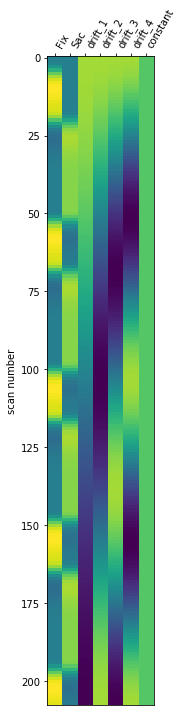

In [57]:
design_matrix = fmri_glm.design_matrices_[0]
plot_design_matrix(design_matrix)
plt.show()

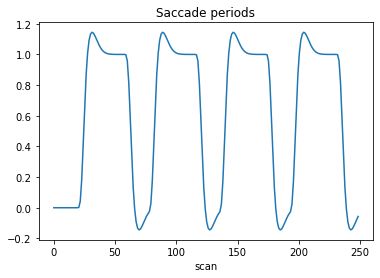

In [59]:
plt.plot(design_matrix['Sac'])
plt.xlabel('Time (seconds)')
plt.title('Saccade periods')
plt.show()

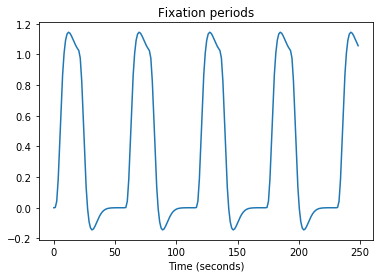

In [60]:
plt.plot(design_matrix['Fix'])
plt.xlabel('Time (seconds)')
plt.title('Fixation periods')
plt.show()

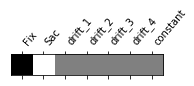

In [64]:
conditions = { 'Fix': np.array([1., 0., 0., 0., 0., 0., 0.]),
               'Sac': np.array([0., 1., 0., 0., 0., 0., 0.])}

sac_minus_fix = conditions['Sac'] - conditions['Fix']
plotting.plot_contrast_matrix(sac_minus_fix, design_matrix=design_matrix)

In [65]:
eff_map = fmri_glm.compute_contrast(sac_minus_fix,
                                    output_type='effect_size')

/Users/martinszinte/anaconda3/envs/idp/lib/python3.7/site-packages/nilearn/_utils/glm.py:300: RuntimeWarning: divide by zero encountered in true_divide
  return np.where(X <= 0, 0, 1. / X)


In [66]:
z_map = fmri_glm.compute_contrast(sac_minus_fix,
                                  output_type='z_score')

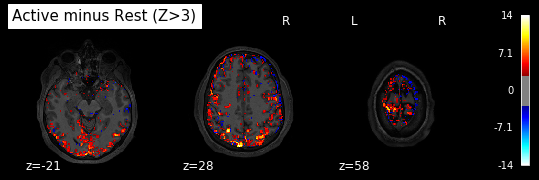

In [70]:
plot_stat_map(z_map, bg_img=anat_img, threshold=3.0,
              display_mode='z', cut_coords=3, black_bg=True,
              title='Active minus Rest (Z>3)')
plt.show()

Uncorrected p<0.001 threshold: 3.291


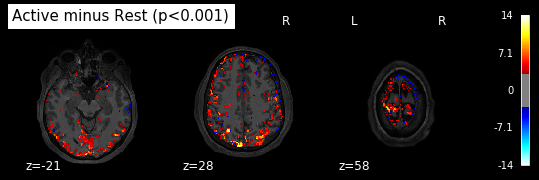

In [72]:
_, threshold = threshold_stats_img(z_map, alpha=.001, height_control='fpr')
print('Uncorrected p<0.001 threshold: %.3f' % threshold)
plot_stat_map(z_map, bg_img=anat_img, threshold=threshold,
              display_mode='z', cut_coords=3, black_bg=True,
              title='Active minus Rest (p<0.001)')
plt.show()

Bonferroni-corrected, p<0.05 threshold: 5.166


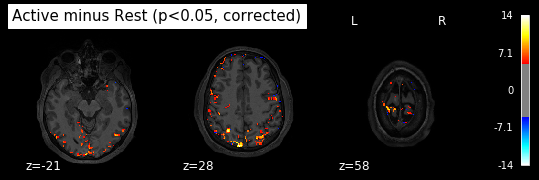

In [74]:
_, threshold = threshold_stats_img(
    z_map, alpha=.05, height_control='bonferroni')
print('Bonferroni-corrected, p<0.05 threshold: %.3f' % threshold)
plot_stat_map(z_map, bg_img=anat_img, threshold=threshold,
              display_mode='z', cut_coords=3, black_bg=True,
              title='Active minus Rest (p<0.05, corrected)')
plt.show()

False Discovery rate = 0.05 threshold: 2.648


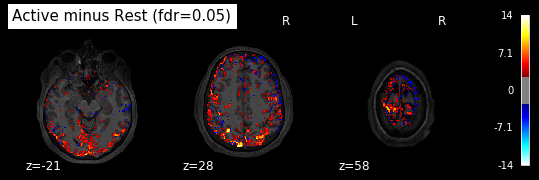

In [75]:
_, threshold = threshold_stats_img(z_map, alpha=.05, height_control='fdr')
print('False Discovery rate = 0.05 threshold: %.3f' % threshold)
plot_stat_map(z_map, bg_img=anat_img, threshold=threshold,
              display_mode='z', cut_coords=3, black_bg=True,
              title='Active minus Rest (fdr=0.05)')
plt.show()

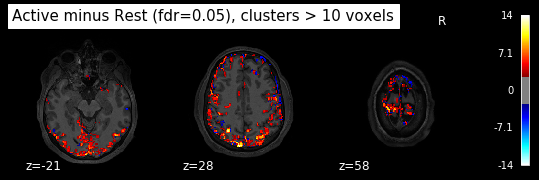

In [76]:
clean_map, threshold = threshold_stats_img(
    z_map, alpha=.05, height_control='fdr', cluster_threshold=10)
plot_stat_map(clean_map, bg_img=anat_img, threshold=threshold,
              display_mode='z', cut_coords=3, black_bg=True,
              title='Active minus Rest (fdr=0.05), clusters > 10 voxels')
plt.show()